In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib

from sklearn.neighbors import KNeighborsClassifier

matplotlib.style.use('ggplot')

In [2]:
data = 'ownership.csv'
df = pd.read_csv(data, sep=';', index_col=False)
df['annual_incoming_in_USD'] = pd.to_numeric(df['annual_incoming_in_USD'])

In [3]:
df

,age,annual_incoming_in_USD,house_ownership_status
0,23,50000,Non-Owner
1,37,34000,Non-Owner
2,48,40000,Owner
3,52,30000,Non-Owner
4,28,95000,Owner
5,25,78000,Non-Owner
6,35,130000,Owner
7,32,105000,Owner
8,20,100000,Non-Owner
9,40,60000,Owner


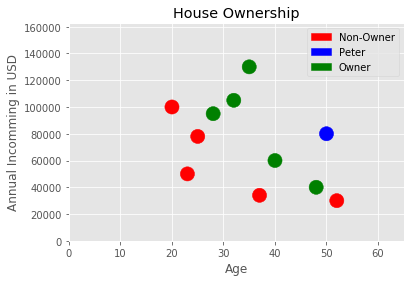

In [4]:
plt.title('House Ownership')
plt.xlabel('Age')
plt.ylabel('Annual Incomming in USD')

df.loc[df['house_ownership_status'] == 'Non-Owner', ['house_ownership_status']] = 'red'
df.loc[df['house_ownership_status'] == 'Owner', ['house_ownership_status']] = 'green'
df.loc[df['house_ownership_status'] == 'Peter', ['house_ownership_status']] = 'blue'

blue_patch = mpatches.Patch(color='blue', label='Peter')
red_patch = mpatches.Patch(color='red', label='Non-Owner')
green_patch = mpatches.Patch(color='green', label='Owner')

plt.legend(handles=[red_patch, blue_patch, green_patch])

plt.xlim(0, df['age'].max() * 1.25)
plt.ylim(0, df['annual_incoming_in_USD'].max() * 1.25)
plt.scatter(df['age'], df['annual_incoming_in_USD'], c=df['house_ownership_status'], s=200)

plt.show()

In [5]:
X, Y = df[['age', 'annual_incoming_in_USD']][:-1].values.tolist(), df[['house_ownership_status']][:-1].values.tolist()

In [6]:
neigh = KNeighborsClassifier(n_neighbors=1)

In [7]:
neigh.fit(X, Y)

c:\xampp\htdocs\data-science-algorithms-in-a-week\.venv\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [8]:
peter = df[['age', 'annual_incoming_in_USD']].iloc[-1].values.tolist()
peter

[50, 80000]

In [9]:
result = neigh.predict([peter])

if result[0] == 'red':
    print('Non-Owner')
else:
    print('Owner')

Non-Owner


In [10]:
df['scaled_age'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())
df['scaled_incoming'] = (df['annual_incoming_in_USD'] - df['annual_incoming_in_USD'].min()) / (df['annual_incoming_in_USD'].max() - df['annual_incoming_in_USD'].min())

In [11]:
df

,age,annual_incoming_in_USD,house_ownership_status,scaled_age,scaled_incoming
0,23,50000,red,0.09375,0.20
1,37,34000,red,0.53125,0.04
2,48,40000,green,0.87500,0.10
3,52,30000,red,1.00000,0.00
4,28,95000,green,0.25000,0.65
5,25,78000,red,0.15625,0.48
6,35,130000,green,0.46875,1.00
7,32,105000,green,0.37500,0.75
8,20,100000,red,0.00000,0.70
9,40,60000,green,0.62500,0.30


In [12]:
X = df[['age', 'annual_incoming_in_USD', 'scaled_age', 'scaled_incoming']].values.tolist()
Y = df['house_ownership_status']

peter.append((peter[0] - df['age'].min()) / (df['age'].max() - df['age'].min()))
peter.append((peter[1] - df['annual_incoming_in_USD'].min()) / (df['annual_incoming_in_USD'].max()) - df['annual_incoming_in_USD'].min())
peter

[50, 80000, 0.9375, -29999.615384615383]

In [13]:
neigh = KNeighborsClassifier(n_neighbors=1)

In [14]:
neigh.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [15]:
result = neigh.predict([peter])

if result[0] == 'red':
    print('Non-Owner')
else:
    print('Owner')

Owner


In [16]:
X = df[['scaled_age', 'scaled_incoming']].values.tolist()

In [17]:
neigh = KNeighborsClassifier(n_neighbors=1)

In [18]:
neigh.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [19]:
result = neigh.predict([peter[-2:]])

if result[0] == 'red':
    print('Non-Owner')
else:
    print('Owner')

Non-Owner
